<a href="https://colab.research.google.com/github/junseokkim93/TensorFlow-and-Deep-Learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensor

There are many definitions for a regression problem but in our case, we're going to simplify it:

predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit

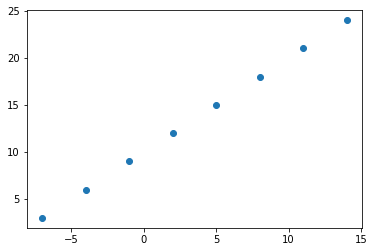

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels;
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


((8,), (8,))

In [ ]:
X[0].shape, y[0].shape , X[0].ndim
# This makes no sense!? Yes it is confusing in case of scalar(shape=0). 


((), (), 0)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output as well as the hiddel layers of a deep learning model.
1.**Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
1. **Fitting a model** - letting the model try to find the patterns betweeen X & y (features and labels.)
1. **Evaluating a model** - 


In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # ndim=1                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 437ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [37]:
 # Try and make a prediction using our model
 y_pred = model.predict([17.0])
 y_true = 27
 model.loss(y_true,y_pred)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([14.283979], dtype=float32)>

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [49]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(x=X,y=y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 309ms/step - loss: 13.3156 - mae: 13.3156
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7707 - mae: 12.7707
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2234 - mae: 12.2234
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6709 - mae: 11.6709
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1104 - mae: 11.1104
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5388 - mae: 10.5388
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9533 - mae: 9.9533
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3508 - mae: 9.3508
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7283 - mae: 8.7283
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0825 - mae: 8.0825
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [43]:
# Let's see if our model's prediction has improved...
model.predict([17])

array([[29.739855]], dtype=float32)

In [53]:
# Let's rebuild our model again

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss="mae",
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 350ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 5ms/step 

In [54]:
model.predict([17])

array([[31.941307]], dtype=float32)

### Evaluating a model
